<a href="https://colab.research.google.com/github/Sehlli/house-price-prediction-/blob/main/housepriceprediction_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
house_price_dataset = sklearn.datasets.load_boston()

In [4]:
# Loading the dataset to a Pandas DataFrame
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)

In [ ]:
# Print First 5 rows of our DataFrame
house_price_dataframe.head()

In [6]:
# add the target (price) column to the DataFrame
house_price_dataframe['price'] = house_price_dataset.target

In [10]:
# checking the number of rows and Columns in the data frame
house_price_dataframe.shape

(506, 14)

In [ ]:
# check for missing values
house_price_dataframe.isnull().sum()

In [ ]:
# statistical measures of the dataset
house_price_dataframe.describe()

Understanding the correlation between various features in the dataset

Positive Correlation

Negative Correlation

In [13]:
correlation = house_price_dataframe.corr()

In [ ]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [15]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [18]:
# loading the model
model = XGBRegressor()
# training the model with X_train
model.fit(X_train, Y_train)

[16:58:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [19]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [20]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9733349094832763
Mean Absolute Error :  1.145314053261634


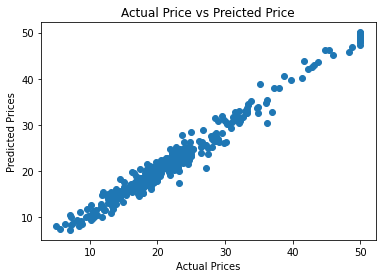

In [21]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [22]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [23]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9115937697657654
Mean Absolute Error :  1.9922956859364223
